# **Titanic Survival Prediction**

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the data

In [2]:
titanic_data=pd.read_csv('/content/drive/MyDrive/CodSoft/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing the data

In [3]:
titanic_data.shape

(418, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic_data = titanic_data.drop(columns="Cabin", axis=1)

In [7]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)
titanic_data["Fare"].fillna(titanic_data["Fare"].mean(), inplace=True)

In [8]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Analyzing data

In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
sns.set()

0    266
1    152
Name: Survived, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

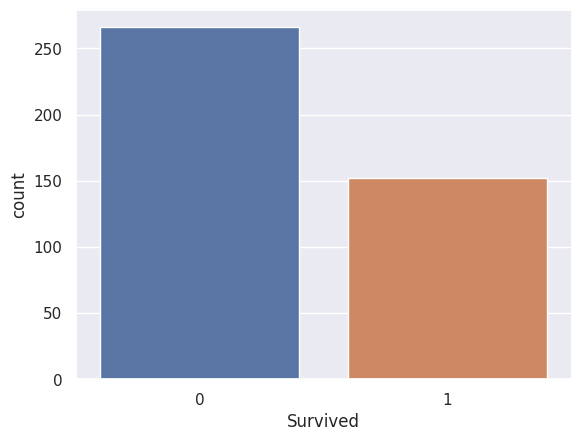

In [11]:
survived_data = titanic_data['Survived'].value_counts()
print(survived_data)
sns.countplot(data=titanic_data, x="Survived")

male      266
female    152
Name: Sex, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

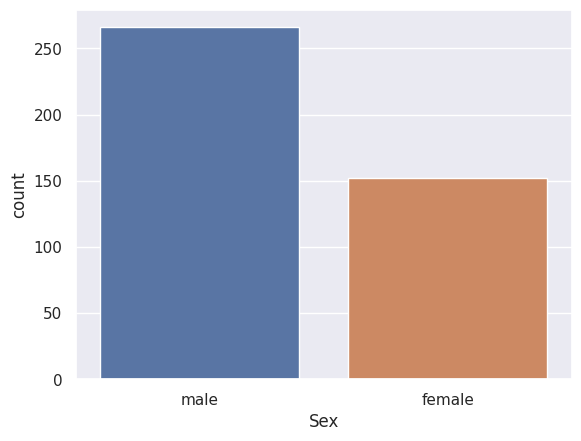

In [12]:
sex_data = titanic_data['Sex'].value_counts()
print(sex_data)
sns.countplot(data=titanic_data, x="Sex")

<Axes: xlabel='Pclass', ylabel='count'>

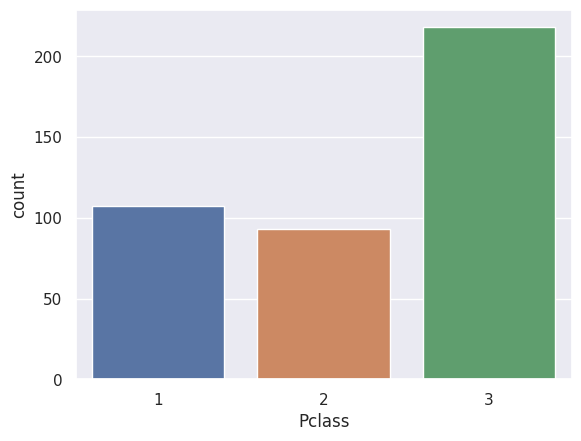

In [13]:
sns.countplot(data=titanic_data,x="Pclass")

S    270
C    102
Q     46
Name: Embarked, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

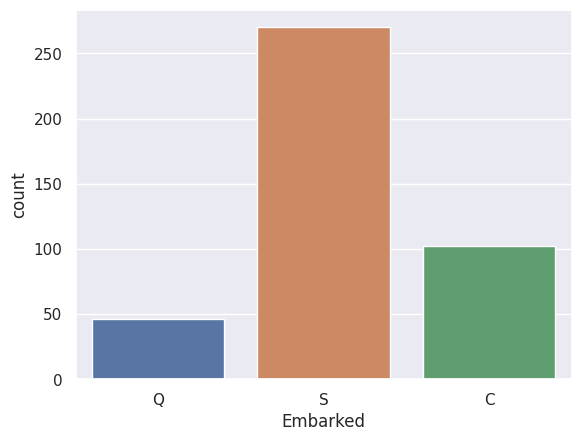

In [14]:
embarked_data = titanic_data['Embarked'].value_counts()
print(embarked_data)
sns.countplot(data=titanic_data,x="Embarked")

In [15]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


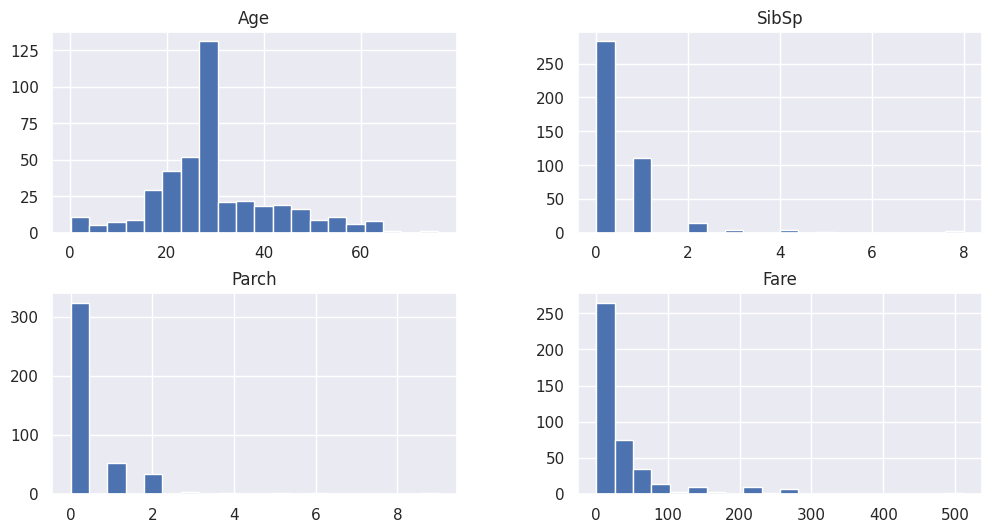

In [17]:
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
titanic_data[numeric_cols].hist(bins=20, figsize=(12, 6))
plt.show()

## Model Training

In [18]:
#separating featurs & target
x = titanic_data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## Model Evalutaion

In [21]:
y_pred = log_model.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%
